In [ ]:
import os
from tqdm import tqdm
import numpy as np 
import pandas as pd
import os
import scipy.ndimage
import nibabel as nib
import matplotlib.pyplot as plt
from numpy.random import rand
from skimage import measure, morphology
from scipy.ndimage import zoom
import cv2
import tensorflow as tf

%matplotlib inline

In [ ]:
#Checking the number of slices with tumor before and after resizing
def seg_img(segmentation):
    # initialize output to zeros
    shp = segmentation.shape
    seg_color = np.zeros((shp[0], shp[1], shp[2], 3), dtype=np.float32)

    seg_color[np.equal(segmentation,2)] = 1
    return seg_color




for i in range(0,210):
    cid = f'{i:05}'
    data_path = "data_resized/case_" + cid 
    img_file = os.path.join(data_path, 'segmentation.nii.gz')  
    
    data_path = "data/case_" + cid 
    img2_file = os.path.join(data_path, 'segmentation.nii.gz')
    
    img = nib.load(img_file)
    seg = img.get_fdata()
    seg = seg.astype(np.int32)
    
    img2 = nib.load(img2_file)
    seg2 = img2.get_fdata()
    seg2 = seg2.astype(np.int32)
    
    s1 = 0
    s2 = 0
    
    count1 = seg_img(seg)
    count2 = seg_img(seg2)
    for j in count1:
        
        if np.sum(j) >=  1:
            s1+=1
    for j in count2:
        
        if np.sum(j) >=  1:
            s2+=1
        
    print(f"{cid} :: New = {s1} ----- Old = {s2}")
    
    

00000 :: New = 56 ----- Old = 57
00001 :: New = 87 ----- Old = 88
00002 :: New = 42 ----- Old = 42
00003 :: New = 29 ----- Old = 29
00004 :: New = 8 ----- Old = 8
00005 :: New = 119 ----- Old = 119
00006 :: New = 11 ----- Old = 11
00007 :: New = 10 ----- Old = 10
00008 :: New = 39 ----- Old = 39
00009 :: New = 9 ----- Old = 9
00010 :: New = 10 ----- Old = 10
00011 :: New = 10 ----- Old = 10
00012 :: New = 15 ----- Old = 15
00013 :: New = 14 ----- Old = 14
00014 :: New = 18 ----- Old = 18
00015 :: New = 12 ----- Old = 12
00016 :: New = 18 ----- Old = 18
00017 :: New = 5 ----- Old = 5
00018 :: New = 15 ----- Old = 15
00019 :: New = 4 ----- Old = 4
00020 :: New = 4 ----- Old = 4
00021 :: New = 6 ----- Old = 6
00022 :: New = 46 ----- Old = 47
00023 :: New = 6 ----- Old = 6
00024 :: New = 12 ----- Old = 12
00025 :: New = 44 ----- Old = 44
00026 :: New = 36 ----- Old = 36
00027 :: New = 45 ----- Old = 47
00028 :: New = 19 ----- Old = 19
00029 :: New = 10 ----- Old = 10
00030 :: New = 32 ----

In [ ]:
#Checking the number of pixels with tumor before and after resizing
def seg_img(segmentation):
    # initialize output to zeros
    shp = segmentation.shape
    seg_color = np.zeros((shp[0], shp[1], shp[2], 3), dtype=np.float32)

    seg_color[np.equal(segmentation,2)] = 1
    return seg_color




for i in range(0,210):
    cid = f'{i:05}'
    data_path = "data_resized/case_" + cid 
    img_file = os.path.join(data_path, 'segmentation.nii.gz') 
    
    data_path = "data/case_" + cid 
    img2_file = os.path.join(data_path, 'segmentation.nii.gz') 
    
    img = nib.load(img_file)
    seg = img.get_fdata()
    seg = seg.astype(np.int32)
    
    img2 = nib.load(img2_file)
    seg2 = img2.get_fdata()
    seg2 = seg2.astype(np.int32)
    
    s1 = 0
    s2 = 0
    
    count1 = seg_img(seg)
    count2 = seg_img(seg2)
    
    for j in count1:
        
        s1+= np.sum(j)
    for j in count2:
        
        s2+= np.sum(j)
        
    print(f"{cid} :: New = {s1} ----- Old = {s2}")

00000 :: New = 12177.0 ----- Old = 55473.0
00001 :: New = 14892.0 ----- Old = 68313.0
00002 :: New = 27504.0 ----- Old = 118890.0
00003 :: New = 9435.0 ----- Old = 41916.0
00004 :: New = 3348.0 ----- Old = 14823.0
00005 :: New = 88782.0 ----- Old = 379332.0
00006 :: New = 4389.0 ----- Old = 19248.0
00007 :: New = 4815.0 ----- Old = 21174.0
00008 :: New = 220116.0 ----- Old = 904932.0
00009 :: New = 3285.0 ----- Old = 14421.0
00010 :: New = 6039.0 ----- Old = 26145.0
00011 :: New = 16281.0 ----- Old = 68487.0
00012 :: New = 64152.0 ----- Old = 264375.0
00013 :: New = 19077.0 ----- Old = 80223.0
00014 :: New = 3369.0 ----- Old = 15540.0
00015 :: New = 8076.0 ----- Old = 34686.0
00016 :: New = 29088.0 ----- Old = 122259.0
00017 :: New = 1923.0 ----- Old = 8556.0
00018 :: New = 6411.0 ----- Old = 27852.0
00019 :: New = 339.0 ----- Old = 1686.0
00020 :: New = 618.0 ----- Old = 2871.0
00021 :: New = 4899.0 ----- Old = 20979.0
00022 :: New = 11328.0 ----- Old = 51231.0
00023 :: New = 612.0 --

00191 :: New = 2475.0 ----- Old = 11340.0
00192 :: New = 189177.0 ----- Old = 774450.0
00193 :: New = 8802.0 ----- Old = 38292.0
00194 :: New = 927.0 ----- Old = 4317.0
00195 :: New = 26637.0 ----- Old = 110778.0
00196 :: New = 15189.0 ----- Old = 64977.0
00197 :: New = 68802.0 ----- Old = 286785.0
00198 :: New = 2313.0 ----- Old = 10443.0
00199 :: New = 79452.0 ----- Old = 329148.0
00200 :: New = 30171.0 ----- Old = 125727.0
00201 :: New = 1125.0 ----- Old = 5169.0
00202 :: New = 82743.0 ----- Old = 346641.0
00203 :: New = 5004.0 ----- Old = 22494.0
00204 :: New = 20025.0 ----- Old = 85095.0
00205 :: New = 2907.0 ----- Old = 12798.0
00206 :: New = 6024.0 ----- Old = 26001.0
00207 :: New = 1413.0 ----- Old = 6165.0
00208 :: New = 591.0 ----- Old = 2799.0
00209 :: New = 477.0 ----- Old = 2259.0


In [ ]:
#Saving the depths in a csv file for easy accessibility
depth = []
for i in range(300):    
    cid = f'{i:05}'
    data_path = "data/case_" + cid 
    img_file = os.path.join(data_path, 'imaging.nii.gz')        
        
    img = nib.load(img_file)
    img = img.get_fdata()
    depth.append(img.shape[0])
    
cases = range(0,300)
dict = {'case': cases, 'depth': depth}       
df = pd.DataFrame(dict) 
df.to_csv('depths.csv', header=True, index=False)

In [ ]:
#Max, Min, Mean, Median of the number of slices
df = pd.read_csv('depths.csv')

MAX = max(df['depth'])
MIN = min(df['depth'])
MEAN = np.mean(df['depth'])
MEDIAN = np.median(df['depth'])

print(f'Maximum number of slices= {MAX}')
print(f'Minimum number of slices = {MIN}')
print(f'Average number of slices= {MEAN}')
print(f'Median of slices = {MEDIAN}')

Maximum number of slices= 1059
Minimum number of slices = 29
Average number of slices= 217.21333333333334
Median of slices = 109.5


In [ ]:
#Checking the distribution of the number of slices
temp = df.groupby(pd.cut(df["depth"], range(0, 1101, 50)))
X = temp['case'].count()
check = []
print(X)
for x,group in temp:
    lst = list(group['case'])
    if not lst:
        continue
    else:
        check.append(lst[0])

depth
(0, 50]          18
(50, 100]       103
(100, 150]       57
(150, 200]       30
(200, 250]       10
(250, 300]       15
(300, 350]       10
(350, 400]        3
(400, 450]        5
(450, 500]        5
(500, 550]        7
(550, 600]        6
(600, 650]       11
(650, 700]        8
(700, 750]        8
(750, 800]        1
(800, 850]        1
(850, 900]        0
(900, 950]        0
(950, 1000]       1
(1000, 1050]      0
(1050, 1100]      1
Name: case, dtype: int64


**Applying SIZ**

In [ ]:
#For displaying segmentation along with the image
def hu_to_grayscale(volume, hu_min = -512, hu_max = 512):
    # Clip at max and min values if specified
    if hu_min is not None or hu_max is not None:
        volume = np.clip(volume, hu_min, hu_max)

    # Scale to values between 0 and 1
    mxval = np.max(volume)
    mnval = np.min(volume)
    im_volume = (volume - mnval)/max(mxval - mnval, 1e-3)

    # Return values scaled to 0-255 range, but *not cast to uint8*
    # Repeat three times to make compatible with color overlay
    im_volume = 255*im_volume
    return np.stack((im_volume, im_volume, im_volume), axis=-1)

def class_to_color(segmentation, k_color = [255, 0, 0], t_color = [0, 0, 255]):
    # initialize output to zeros
    shp = segmentation.shape
    seg_color = np.zeros((shp[0], shp[1], shp[2], 3), dtype=np.float32)

    # set output to appropriate color at each location
    seg_color[np.equal(segmentation,1)] = k_color
    seg_color[np.equal(segmentation,2)] = t_color
    return seg_color

def overlay(volume_ims, segmentation_ims, segmentation, alpha):
    # Get binary array for places where an ROI lives
    segbin = np.greater(segmentation, 0)
    repeated_segbin = np.stack((segbin, segbin, segbin), axis=-1)
    # Weighted sum where there's a value to overlay
    overlayed = np.where(
        repeated_segbin,
        np.round(alpha*segmentation_ims+(1-alpha)*volume_ims).astype(np.uint8),
        np.round(volume_ims).astype(np.uint8)
    )
    return overlayed



In [ ]:

width, height = 299, 299

def resize_image(img):
    img_sm = np.zeros((len(img), width, height))
    for i in range(len(img)):
        idx = img[i, :, :]
        idx_sm = cv2.resize(idx, (width, height), interpolation=cv2.INTER_AREA)
        img_sm[i, :, :] = idx_sm
        
    return img_sm

def change_depth_siz(img):
    desired_depth = 160
    current_depth = img.shape[0]
    depth = current_depth / desired_depth
    depth_factor = 1 / depth
    img_new = zoom(img, (depth_factor, 1, 1), mode='nearest')
    return img_new

def seg_slices(seg, seg_type):
    seg = seg.astype(np.float32)
    segbin = np.equal(seg, seg_type)
    count = 0
    indx = 0
    indxL = []
    X = (np.sum(np.sum(segbin, axis = 2), axis = 1))
        
    for i in X:
        if i >0:
            count += 1
            indxL.append(indx)
        indx += 1    
    return count, indxL


In [ ]:
Kidney = []
Tumor = []
prevK = []
newK = []
prevT = []
newT = []
for i in check:
    print("\n#################################################################\n")    

    cid = f'{i:05}'
    path = f"data_np/case_{cid}/"
    print("Case ID: ", cid)
    
    
    img = np.load(path + 'img.npy')
    print("\n\nRaw image shape: ", img.shape)
    seg = np.load(path + 'seg.npy')
    seg = seg.astype(np.float32)

    
    countK, indxK = seg_slices(seg, seg_type = 1)
    countT, indxT = seg_slices(seg, seg_type = 2)
    prevK.append(countK)
    prevT.append(countT)
    print("\nSlices with Kidney Segmentation: ", countK)
    print("From ",indxK[0], " to ", indxK[-1])
    print("\nSlices with Tumor Segmentation: ", countT)
    print("From ",indxT[0], " to ", indxT[-1])

    
    img = resize_image(img)
    seg = resize_image(seg)
    seg = seg.astype(np.int32)
    print("\nNew volume size: ", img.shape)

    
    img_siz = change_depth_siz(img)
    seg_siz = change_depth_siz(seg)
    print(f'\nNew depth size: {img_siz.shape}')


    new_countK, new_indxK = seg_slices(seg_siz, seg_type = 1)
    new_countT, new_indxT = seg_slices(seg_siz, seg_type = 2)
    newK.append(new_countK)
    newT.append(new_countT)
    print("\nSlices with Kidney Segmentation: ", new_countK)
    print("From ",new_indxK[0], " to ", new_indxK[-1])
    print("\nSlices with Tumor Segmentation: ", new_countT)
    print("From ",new_indxT[0], " to ", new_indxT[-1])

    K = round(new_countK / countK, 2)
    T = round(new_countT / countT, 2)
    
    print("\nRatio for Kidney : ",K)
    print("\nRatio for Tumor : ",T)
    
    Kidney.append(str(K))
    Tumor.append(str(T))

    
print("\n#################################################################\n")    
print("\nKidney :\n", str(K),"\nTumor :\n", str(T))


#################################################################

Case ID:  00010


Raw image shape:  (50, 512, 512)

Slices with Kidney Segmentation:  41
From  9  to  49

Slices with Tumor Segmentation:  10
From  10  to  19

New volume size:  (50, 299, 299)

New depth size: (160, 299, 299)

Slices with Kidney Segmentation:  132
From  28  to  159

Slices with Tumor Segmentation:  32
From  32  to  63

Ratio for Kidney :  3.22

Ratio for Tumor :  3.2

#################################################################

Case ID:  00004


Raw image shape:  (64, 512, 512)

Slices with Kidney Segmentation:  34
From  19  to  52

Slices with Tumor Segmentation:  8
From  39  to  46

New volume size:  (64, 299, 299)

New depth size: (160, 299, 299)

Slices with Kidney Segmentation:  86
From  47  to  132

Slices with Tumor Segmentation:  21
From  97  to  117

Ratio for Kidney :  2.53

Ratio for Tumor :  2.62

#################################################################

Case ID:  00018


Raw



Raw image shape:  (1059, 512, 512)

Slices with Kidney Segmentation:  283
From  585  to  867

Slices with Tumor Segmentation:  256
From  645  to  912

New volume size:  (1059, 299, 299)

New depth size: (160, 299, 299)

Slices with Kidney Segmentation:  50
From  88  to  137

Slices with Tumor Segmentation:  38
From  97  to  136

Ratio for Kidney :  0.18

Ratio for Tumor :  0.15

#################################################################


Kidney :
 0.18 
Tumor :
 0.15


In [ ]:
case_id = []
prev_slices = []
for i in check:
    cid = f'{i:05}'
    case_id.append(str(cid))
    path = f"data_np/case_{cid}/"    
    
    img = np.load(path + 'img.npy')
    prev_slices.append(len(img))

In [ ]:
#Checking the before and after effect of SIZ
lower = list(range(0,1100,50))
upper = list(range(50,1101,50))
lower.remove(850)
lower.remove(900)
lower.remove(1000)
upper.remove(900)
upper.remove(950)
upper.remove(1050)
d = {'range_start': lower, 
        'range_end': upper,
        'Total_cases':g,
        'Selected_case': case_id,
        'Previous_depth':prev_slices,
        'New_depth': [160] * 19 ,
        'Prev_Kidney_slices': prevK,
        'New_Kidney_slices': newK,
        'Prev_Tumor_slices': prevT,
        'New_Tumor_slices': newT,
        'Kidney_ratio':Kidney,
        'Tumor_ratio': Tumor,} 
data_SIZ = pd.DataFrame(d) 

data_SIZ.to_csv('SIZ_160_299.csv', header=True, index=False)

In [ ]:
print(len(case_id))

18


In [ ]:
cid = f'{123:05}'
path = f"data_np/case_{cid}/"
        
img = np.load(path + 'img.npy')
print("Raw volume size: ", img.shape)
seg = np.load(path + 'seg.npy')
seg = seg.astype(np.float32)
segbin = np.equal(seg, 2)
print(segbin.shape)
count = 0
indx = 0
indxL = []
X = (np.sum(np.sum(segbin, axis = 2), axis = 1))
        
for i in X:
    if i >0:
        count += 1
        indxL.append(indx)
    indx += 1    
print(count)
print(indxL)

Raw volume size:  (389, 512, 512)
(389, 512, 512)
11
[125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]


Raw volume size:  (75, 512, 512)
New volume size:  (75, 299, 299)
New volume size:  (75, 299, 299)
New depth size: (160, 299, 299)
New depth size: (160, 299, 299)


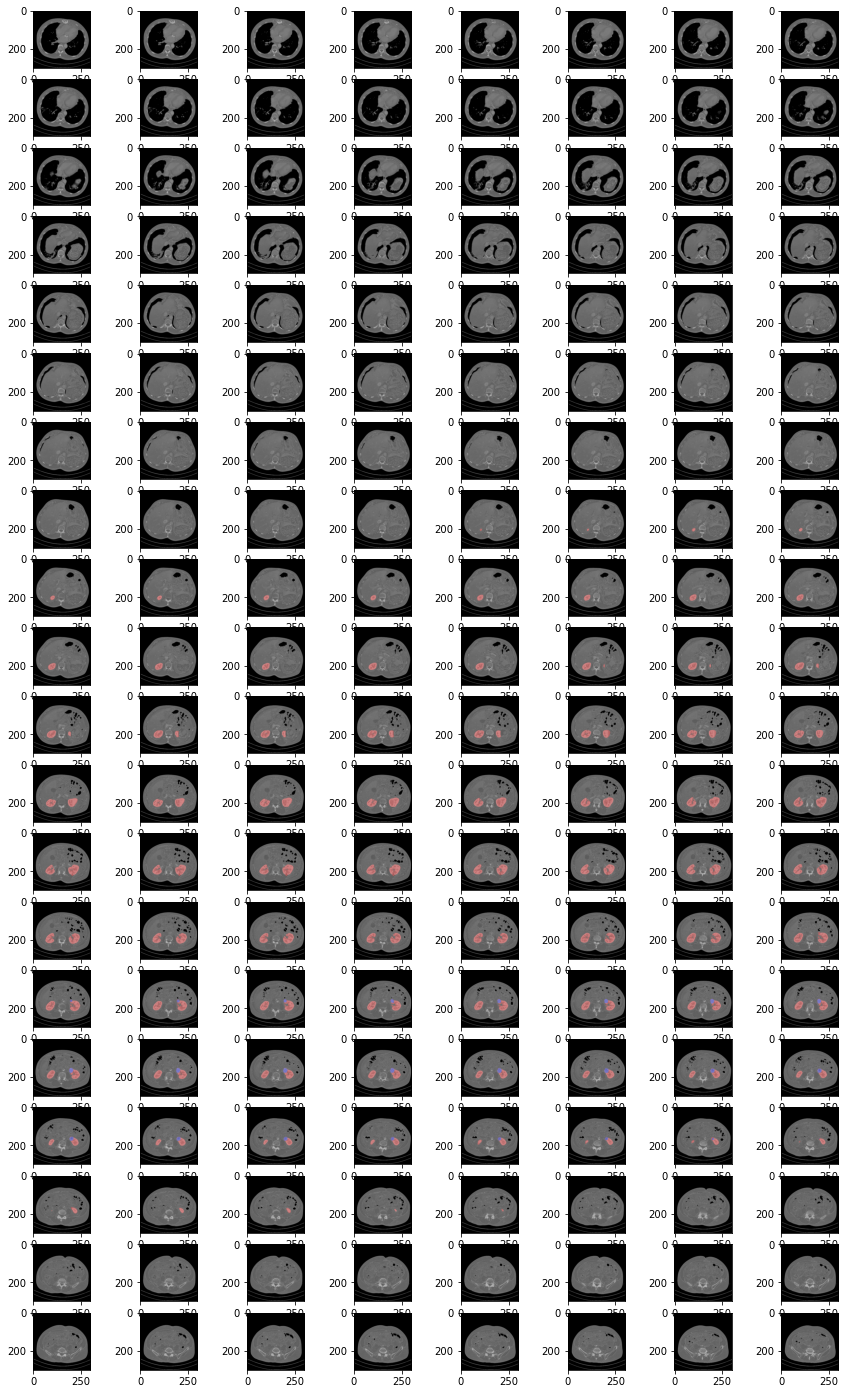

In [ ]:
#Visualizing after SIZ
w, h = 299, 299
def rs_img(img):
    '''W and H is 128 now
    '''
    img_sm = np.zeros((len(img), w, h))
    #img = np.transpose(img)
    #flatten = [cv2.resize(img[i,:,:], (w, h), interpolation=cv2.INTER_CUBIC) for i in range(img.shape[0])]
    for i in range(len(img)):
        idx = img[i, :, :]
        idx_sm = cv2.resize(idx, (w, h), interpolation=cv2.INTER_AREA)
        img_sm[i, :, :] = idx_sm
    
    #img = np.array(np.dstack(flatten)) 
    return img_sm

def change_depth_siz(img):
    desired_depth = 160
    current_depth = img.shape[0]
    depth = current_depth / desired_depth
    depth_factor = 1 / depth
    img_new = zoom(img, (depth_factor, 1, 1), mode='nearest')
    print(f'New depth size: {img_new.shape}')
    return img_new


cid = f'{15:05}'
path = f"data_np/case_{cid}/"
        
img = np.load(path + 'img.npy')
print("Raw volume size: ", img.shape)
seg = np.load(path + 'seg.npy')
seg = seg.astype(np.float32)

img = rs_img(img)
seg = rs_img(seg)
seg = seg.astype(np.int32)

print("New volume size: ", img.shape)
print("New volume size: ", seg.shape)



img_siz_1 = change_depth_siz(img)
seg_siz = change_depth_siz(seg)


img_siz = hu_to_grayscale(img_siz_1, -512, 512)
seg_siz = class_to_color(seg_siz, [255, 0, 0], [0, 0, 255])

plt.subplots(20, 8,figsize=(15, 25))
x = 1
for i in range(1, 21):
    for j in range(1, 9):
        plt.subplot(20, 8, x)
        image = overlay(img_siz, seg_siz, img_siz_1, 0.3)
        plt.imshow(image[x-1], cmap='gray')
        x += 1
plt.show()

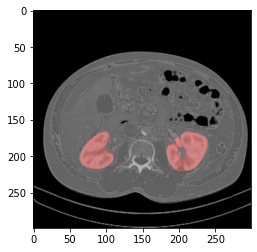

In [ ]:
plt.imshow(image[100], cmap='gray')
plt.show()

Raw volume size:  (389, 512, 512)
(128, 512, 512)
(128, 512, 512)


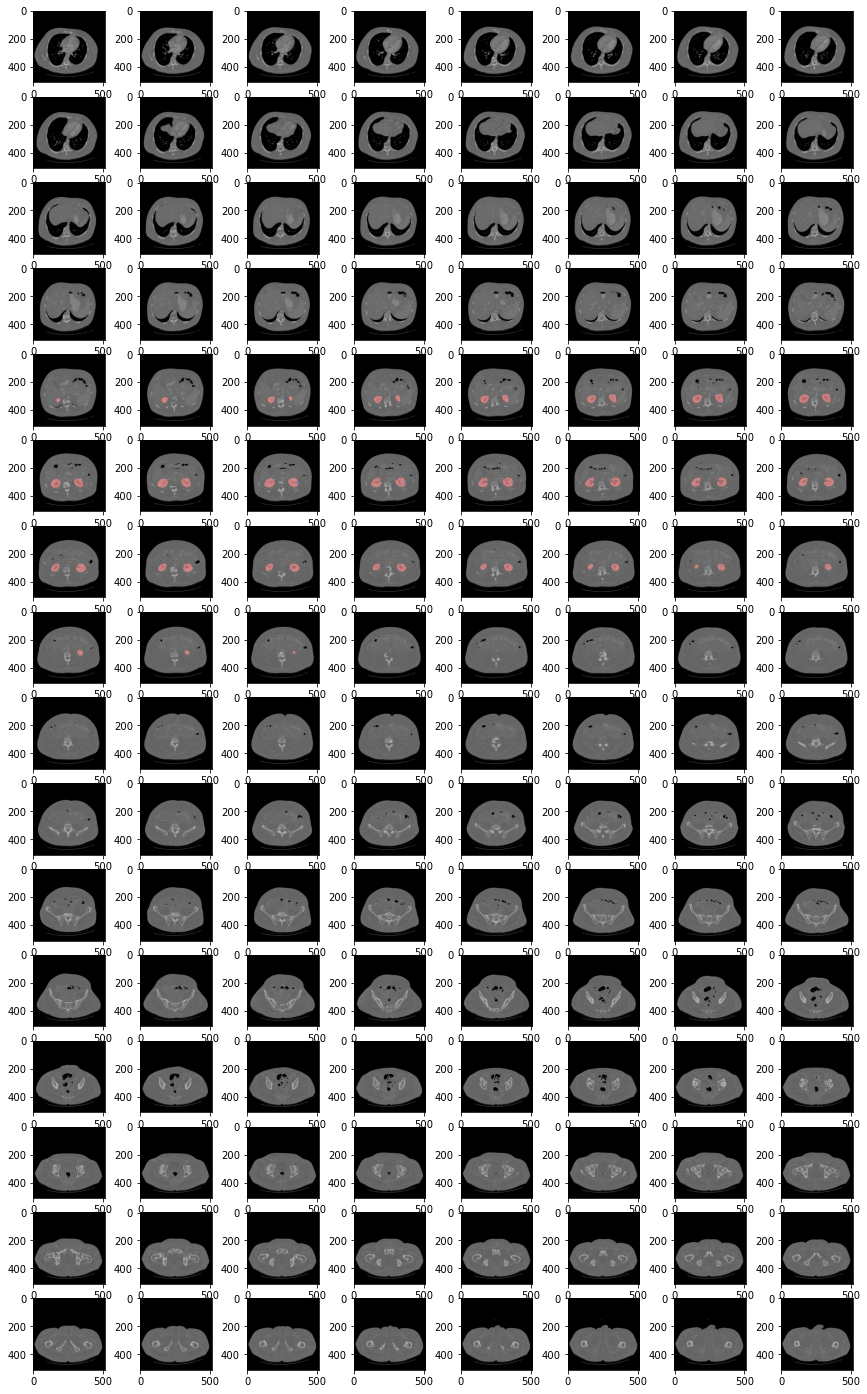

In [ ]:
# Spline interpolated zoom (SIZ)
def change_depth_siz(img):
    desired_depth = 128
    current_depth = img.shape[0]
    depth = current_depth / desired_depth
    depth_factor = 1 / depth
    img_new = zoom(img, (depth_factor, 1, 1), mode='nearest')
    print(img_new.shape)
    return img_new

cid = f'{123:05}'
path = f"data_np/case_{cid}/"
        
img = np.load(path + 'img.npy')
print("Raw volume size: ", img.shape)
seg = np.load(path + 'seg.npy')
seg = seg.astype(np.int32)

img_siz_1 = change_depth_siz(img)
seg_siz = change_depth_siz(seg)


img_siz = hu_to_grayscale(img_siz_1, -512, 512)
seg_siz = class_to_color(seg_siz, [255, 0, 0], [0, 0, 255])

plt.subplots(16, 8,figsize=(15, 25))
x = 1
for i in range(1, 17):
    for j in range(1, 9):
        plt.subplot(16, 8, x)
        image = overlay(img_siz, seg_siz, img_siz_1, 0.3)
        plt.imshow(image[x-1], cmap='gray')
        x += 1
plt.show()
#imshow(test_data[i][j], cmap='gray')                   

**Extra Blocks**

In [ ]:
cid = f'{123:05}'
path = f"data_np/case_{cid}/"
        
img = np.load(path + 'img.npy')
print("Raw volume size: ", img.shape)
seg = np.load(path + 'seg.npy')
seg = seg.astype(np.float32)
segbin = np.greater(seg, 0)
print(segbin.shape)
count = 0
indx = 0
indxL = []
X = (np.sum(np.sum(segbin, axis = 2), axis = 1))
        
for i in X:
    if i >0:
        count += 1
        indxL.append(indx)
    indx += 1    
print(count)
print(indxL)

Raw volume size:  (389, 512, 512)
(389, 512, 512)
85
[95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]


In [ ]:
cid = f'{123:05}'
path = f"data_np/case_{cid}/"
        
img = np.load(path + 'img.npy')
print("Raw volume size: ", img.shape)
seg = np.load(path + 'seg.npy')
seg = seg.astype(np.float32)
segbin = np.equal(seg, 2)
print(segbin.shape)
count = 0
indx = 0
indxL = []
X = (np.sum(np.sum(segbin, axis = 2), axis = 1))
        
for i in X:
    if i >0:
        count += 1
        indxL.append(indx)
    indx += 1    
print(count)
print(indxL)

Raw volume size:  (389, 512, 512)
(389, 512, 512)
11
[125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]


In [ ]:
caseid = []
X = list(range(0, 300))
idx = 50
for i in range(0,23):
    cid = df.loc[pd.IndexSlice[df['depth'] <= idx], 'case']


SyntaxError: cannot assign to conditional expression (<ipython-input-74-d3afaedd2a6a>, line 10)

In [ ]:
#Currently not in use
def normalize(image):
    global MIN_BOUND
    global MAX_BOUND
    
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image


def zero_center(image):
    image = image - PIXEL_MEAN
    return image


def plot_seq(data, name):
    
    a, b = 4, 16
    data = np.reshape(data, (a, b, 512, 389))
    test_data = data
    r, c = test_data.shape[0], test_data.shape[1]

    cmaps = [['viridis', 'binary'], ['plasma', 'coolwarm'], ['Greens', 'copper']]

    heights = [a[0].shape[0] for a in test_data]
    widths = [a.shape[1] for a in test_data[0]]

    fig_width = 10.  # inches
    fig_height = fig_width * sum(heights) / sum(widths)

    f, axarr = plt.subplots(r,c, figsize=(fig_width, fig_height),
          gridspec_kw={'height_ratios':heights})

    for i in range(r):
        for j in range(c):
            axarr[i, j].imshow(test_data[i][j], cmap='gray')
            axarr[i, j].axis('off')
    
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    #plt.savefig('{}/{}.png'.format(log_path, name), dpi=1000)
    plt.show()

In [ ]:
temp = df['depth']
temp = np.sort(temp)
bins = []
t = 0
for j in range(50,1101,50):
    count = 0
    for i in temp:
        if i<=j:
            count+=1
    print(f"< {j} ::: {count - t}")
    bins.append(count - t)
    t = count


< 50 ::: 18
< 100 ::: 103
< 150 ::: 57
< 200 ::: 30
< 250 ::: 10
< 300 ::: 15
< 350 ::: 10
< 400 ::: 3
< 450 ::: 5
< 500 ::: 5
< 550 ::: 7
< 600 ::: 6
< 650 ::: 11
< 700 ::: 8
< 750 ::: 8
< 800 ::: 1
< 850 ::: 1
< 900 ::: 0
< 950 ::: 0
< 1000 ::: 1
< 1050 ::: 0
< 1100 ::: 1


Raw volume size:  (389, 512, 512)
Final shape:  (128, 512, 512)
Final shape:  (128, 512, 512)


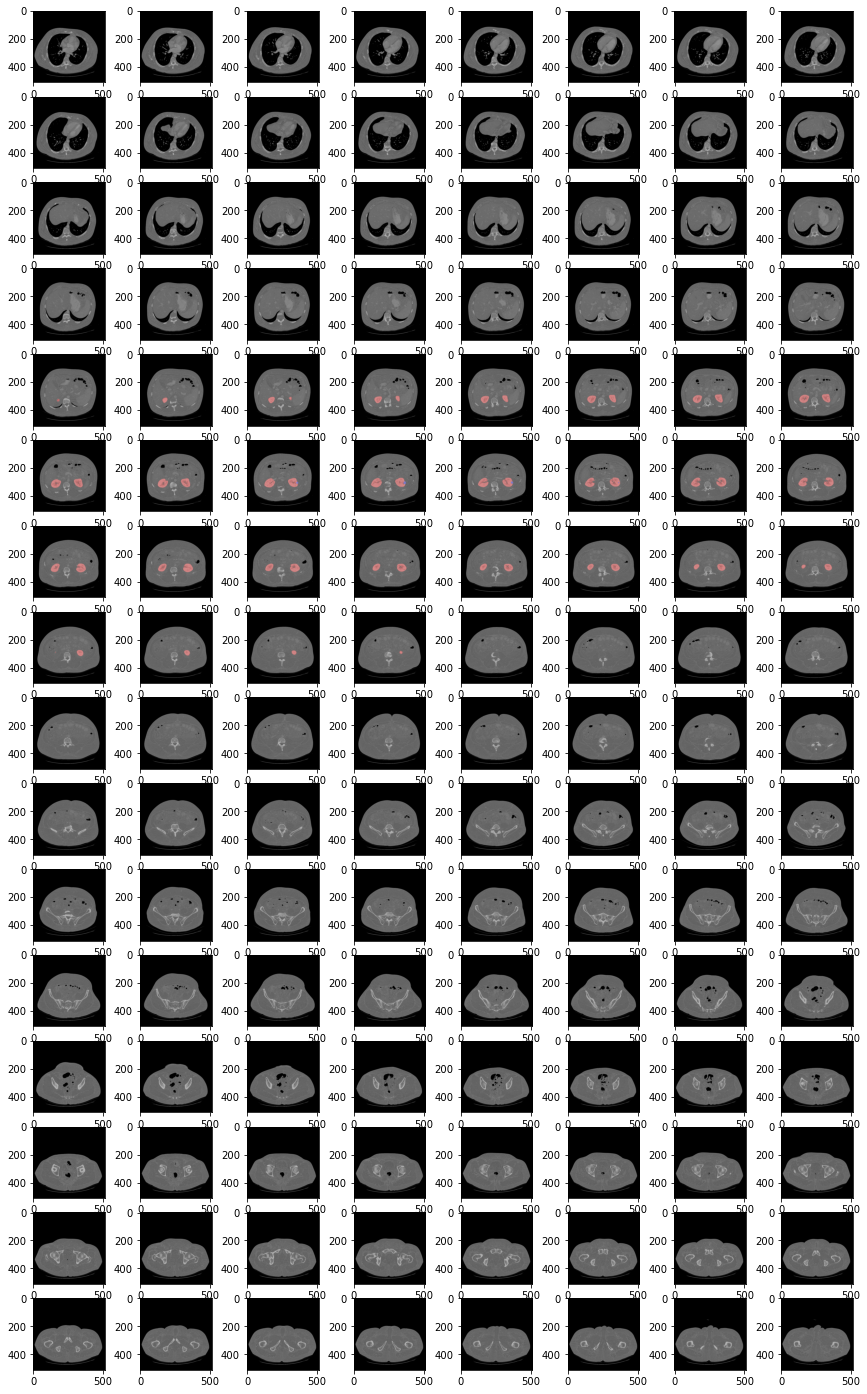

In [ ]:
def change_depth_ess(img):
    
    '''ESS depth size is 32 as min depth size is 47, so we cannot evenly select 64 slices!'''

    # Ignore volumes which have depth less than 64
    target_depth = 128

    #print(img.shape) 

    scan_depth = int(img.shape[0])
    
    # If depth is not 64, make it 64
    if scan_depth < 128:
        number = 128 - scan_depth
        #print(number)
        # take last image and stack
        extend = [img[:,:,-1] for _ in range(number)]
        extend = np.array(np.dstack(extend))
        #print(extend.shape)
        img = np.concatenate((img, extend), axis=2)
    
    else:
        factor = int(np.floor(scan_depth / target_depth)) # min depth is 32
        #print(factor) # floor and ceil result in different values
        #print(scan_depth, factor)

        flatten = []
        idx = 0

        for i in range(0, scan_depth, factor):
          #print(idx)

            if idx>=scan_depth:
                break
            else:
                flatten.append(img[i,:,:])

        img = np.array(np.stack(flatten))

    # hardcode from bottom, if not 64 slices
    img = img[:target_depth,:,:]     

    print("Final shape: ", img.shape)
    
    # hardcode from bottom, if not 32 slices
    #img = img[:,:,:target_depth]

    assert img.shape[0] == target_depth , "Error"
    return img



cid = f'{123:05}'
path = f"data_np/case_{cid}/"
        
img = np.load(path + 'img.npy')
print("Raw volume size: ", img.shape)
seg = np.load(path + 'seg.npy')
seg = seg.astype(np.int32)

img_siz_1 = change_depth_ess(img)
seg_siz = change_depth_ess(seg)


img_siz = hu_to_grayscale(img_siz_1, -512, 512)
seg_siz = class_to_color(seg_siz, [255, 0, 0], [0, 0, 255])

plt.subplots(16, 8,figsize=(15, 25))
x = 1
for i in range(1, 17):
    for j in range(1, 9):
        plt.subplot(16, 8, x)
        image = overlay(img_siz, seg_siz, img_siz_1, 0.3)
        plt.imshow(image[x-1], cmap='gray')
        x += 1
plt.show()

In [ ]:
not_converted = []
missing = []

def convert_img_to_np():
    
    
    #Make a directory for numpy format
    if not os.path.exists('data_np'):   
        os.makedirs('data_np/')
    for i in check:
        
        
        #Specify the path 
        cid = f'{i:05}'
        data_path = "data/case_" + cid 
        img_file = os.path.join(data_path, 'imaging.nii.gz')
        seg_file = os.path.join(data_path, 'segmentation.nii.gz')
        
        
        
        #load nii.gz files
        img = nib.load(img_file)
        seg = nib.load(seg_file)
        
        
        
        #Convert to numpy arrays otherwise raise error and append to list
        print(f'\nCase number : {cid}')
        try:
            img = img.get_fdata()
            print(f'Img shape: {img.shape}')
            seg = seg.get_fdata()
            print(f'Seg shape: {seg.shape}')
            
            
            #Check if the no. of slices are equal
            if len(img) != len(seg):
                missing.append(cid)
                
        except:
            not_converted.append(cid)
            continue
        
        
        
        #Save each case in a different folder
        path = f'data_np/case_{cid}'
        if not os.path.exists(path): 
            os.makedirs(path)
        np.save(f'data_np/case_{cid}/img.npy', img)
    
    
    
    #print the one's that were not downloaded
    if (len(not_converted) == 0):
        print("\n\nDownloaded successfully!")
    else:
        print(f"\n\nNot downloaded properly:\n{not_converted}")
        
    if (len(missing) == 0):
        print("\n\nNo missing slices")
    else:
        print(f"\n\nMissing slices in:\n{missing}")



In [ ]:
not_converted = []
missing = []

def convert_seg_to_np():
    
    for i in check:
        
        
        #Specify the path 
        cid = f'{i:05}'
        data_path = "data/case_" + cid 
        seg_file = os.path.join(data_path, 'segmentation.nii.gz')
        
        
        #load nii.gz file
        seg = nib.load(seg_file)
        
        
        
        #Convert to numpy arrays otherwise raise error and append to list
        print(f'\nCase number : {cid}')
        try:
            seg = seg.get_fdata()
            print(f'Seg shape: {seg.shape}')
                            
        except:
            not_converted.append(cid)
            continue
        
        
        
        #Save each case in a different folder        
        np.save(f'data_np/case_{cid}/seg.npy', seg)

    
    
    #print the one's that were not downloaded
    if (len(missing) == 0):
        print("\n\nNo missing slices")
    else:
        print(f"\n\nMissing slices in:\n{missing}")

In [ ]:
convert_img_to_np()
convert_seg_to_np()


Case number : 00010
Img shape: (50, 512, 512)
Seg shape: (50, 512, 512)

Case number : 00004
Img shape: (64, 512, 512)
Seg shape: (64, 512, 512)

Case number : 00018
Img shape: (121, 512, 512)
Seg shape: (121, 512, 512)

Case number : 00006
Img shape: (157, 512, 512)
Seg shape: (157, 512, 512)

Case number : 00008
Img shape: (227, 512, 512)
Seg shape: (227, 512, 512)

Case number : 00002
Img shape: (261, 512, 512)
Seg shape: (261, 512, 512)

Case number : 00026
Img shape: (302, 512, 512)
Seg shape: (302, 512, 512)

Case number : 00123
Img shape: (389, 512, 512)
Seg shape: (389, 512, 512)

Case number : 00014
Img shape: (439, 512, 512)
Seg shape: (439, 512, 512)

Case number : 00100
Img shape: (470, 512, 512)
Seg shape: (470, 512, 512)

Case number : 00022
Img shape: (541, 512, 512)
Seg shape: (541, 512, 512)

Case number : 00053
Img shape: (553, 512, 512)
Seg shape: (553, 512, 512)

Case number : 00000
Img shape: (611, 512, 512)
Seg shape: (611, 512, 512)

Case number : 00049
Img shap

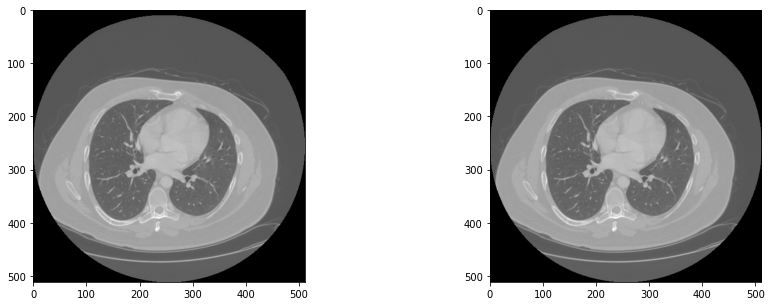

In [ ]:
cid = f'{123:05}'
path = f"data_np/case_{cid}/"
        
img = np.load(path + 'img.npy')
new_img = (img - 50000)
plt.subplots(1, 2,figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img[0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(new_img[0], cmap='gray')
plt.show()


In [ ]:
#from numpy to nii.gz
func_filename = os.path.join(data_path, 'task-rest_bold.nii.gz')

# load the data
func = nib.load(func_filename)

ni_img = nib.Nifti1Image(output, func.affine)

nib.save(ni_img, 'output.nii.gz')

In [ ]:
from keras import backend as K
import numpy as np
kvar = K.variable([np.random.randint(4, size=10), np.random.randint(4, size=10) , np.random.randint(4, size=10)])
print(kvar)
kvar_ones = K.switch(K.greater(kvar, 1), K.ones_like(kvar), K.zeros_like(kvar))
K.eval(kvar_ones)

<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([1., 3., 0., 1., 1., 0., 3., 3., 1., 3.], dtype=float32)>


array([0., 1., 0., 0., 0., 0., 1., 1., 0., 1.], dtype=float32)

In [ ]:
from keras import backend as K
import numpy as np
kvar = K.variable([[0.47470462, 0.04492385, 0.00057181]])
print(kvar[0][0])
n = K.cast(K.shape(kvar)[-1], 'float32')
print(n)

tf.Tensor(0.47470462, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)


In [ ]:
from keras import backend as K
import numpy as np
l = list([0.51481366, 0.04011732, 0.00091695])
kvar = K.variable([l])
print(kvar)
n = K.pow(1 - kvar, 0.75)
print(n)

<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[0.51481366, 0.04011732, 0.00091695]], dtype=float32)>
tf.Tensor([[0.58134156 0.9697585  0.9993122 ]], shape=(1, 3), dtype=float32)


In [ ]:
from keras import backend as K
import numpy as np
kvar = K.variable([[[[np.random.randint(4, size=3), np.random.randint(4, size=3) , np.random.randint(4, size=3)]]]])
kvar2 = K.variable([[[[np.random.randint(4, size=3), np.random.randint(4, size=3) , np.random.randint(4, size=3)]]]])

def identify_axis(shape):
    # Three dimensional
    if len(shape) == 5 : return [1,2,3]
    # Two dimensional
    elif len(shape) == 4 : return [1,2]
    # Exception - Unknown
    else : raise ValueError('Metric: Shape of tensor is neither 2D or 3D.')
axis = identify_axis(kvar.get_shape())
print(K.sum(kvar * kvar2, axis=axis))
newk = K.flatten(kvar)
newk2 = K.flatten(kvar2)
print(K.sum(newk * newk2))

tf.Tensor([[ 9. 14. 12.]], shape=(1, 3), dtype=float32)
tf.Tensor(35.0, shape=(), dtype=float32)


In [ ]:
from keras import backend as K
import numpy as np
import tensorflow as tf
kvar = K.variable(np.random.randint(3, size=1))
print(kvar)
fs = open("myfile.txt", "w")
fs.write(f'k  = {kvar}')
fs.close()

SyntaxError: invalid syntax (<ipython-input-22-0f836986647b>, line 4)

In [ ]:
import pandas as pd
df = pd.read_csv("my_files/tversky_var.csv", delimiter=' ')
df

,background,kidney,tumor
0,0.420896,0.054881,0.001169
1,0.408906,0.055442,0.002159
2,0.383958,0.001539,0.000018
3,0.389900,0.021691,0.000019
4,0.341215,0.000181,0.000018
...,...,...,...
995,0.004551,0.000026,0.001418
996,0.004810,0.000106,0.007820
997,0.004126,0.000029,0.032221
998,0.003834,0.000023,0.006243


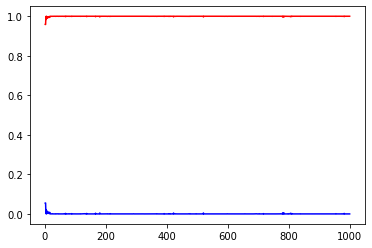

In [ ]:

import matplotlib.pyplot as plt
x = range(1,1001)
b = df["background"]
k = df["kidney"]
t = df["tumor"]
t = (1 - k)**0.75
#plt.plot(x, b, color = "green")
plt.plot(x, k, color = "blue")
plt.plot(x, t, color = "red")

In [ ]:
import math
x = math.cosh(0.999987806)
print(math.log(x))

0.43377154363511344
